# **Explorative Data Analysis**

In [1]:
# Imports and loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", context="notebook")

df = pd.read_csv("../data/processed/data_for_model.csv")
df.head()



,Standort_ID,Datum,Koord_Ost,Koord_Nord,Velo,year,day_of_year,Niederschlag,Temperatur Durchschnitt,weekday,weekend,is_holiday
0,60,2022-01-01,2682731,1247708,134.0,2022,1,0.0,2.6,5,True,True
1,732,2022-01-01,2681319,1248665,447.0,2022,1,0.0,2.6,5,True,True
2,1037,2022-01-01,2681339,1248647,1141.0,2022,1,0.0,2.6,5,True,True
3,2977,2022-01-01,2682681,1250570,259.0,2022,1,0.0,2.6,5,True,True
4,2978,2022-01-01,2683406,1251617,97.0,2022,1,0.0,2.6,5,True,True


In [4]:
# Basic Info
df.info
df.describe(include="all")
#df.isna().sum()


,Standort_ID,Velo,year,day_of_year,Niederschlag,Temperatur Durchschnitt,weekday,weekend,is_holiday
count,23799.000000,23799.000000,23799.000000,23799.000000,23799.000000,23799.000000,23799.000000,23799,23799
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16976,17749
mean,3338.522837,1448.097567,2023.055843,183.836212,2.875654,11.297912,2.999538,NaN,NaN
std,1114.347190,1124.514000,0.810231,106.013649,5.589763,7.283568,2.003076,NaN,NaN
min,60.000000,1.000000,2022.000000,1.000000,0.000000,-7.300000,0.000000,NaN,NaN
25%,2989.000000,670.500000,2022.000000,91.000000,0.000000,5.600000,1.000000,NaN,NaN
50%,3012.000000,1130.000000,2023.000000,184.000000,0.000000,11.000000,3.000000,NaN,NaN
75%,4257.000000,1880.000000,2024.000000,276.000000,3.500000,17.700000,5.000000,NaN,NaN


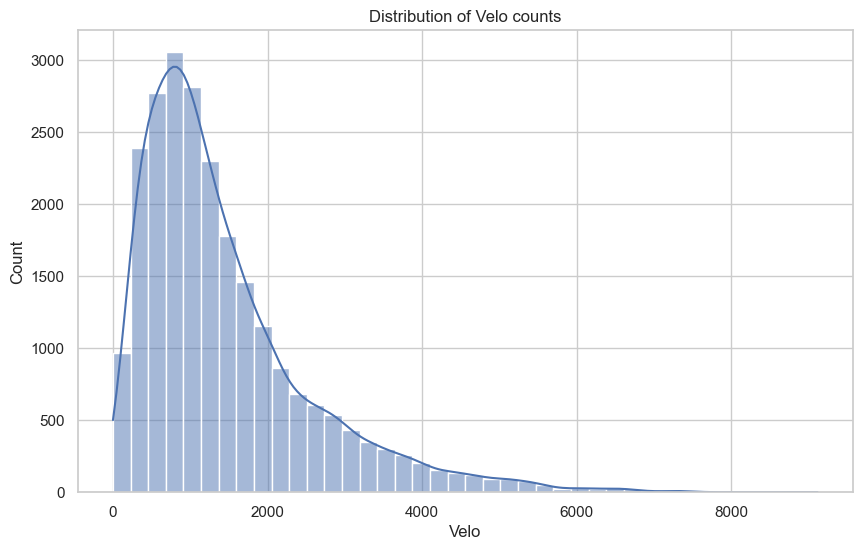

In [12]:
#Distribution of target variable
plt.figure(figsize=(10,6))
sns.histplot(df["Velo"], kde=True, bins=40)
plt.title("Distribution of Velo counts")
plt.show()



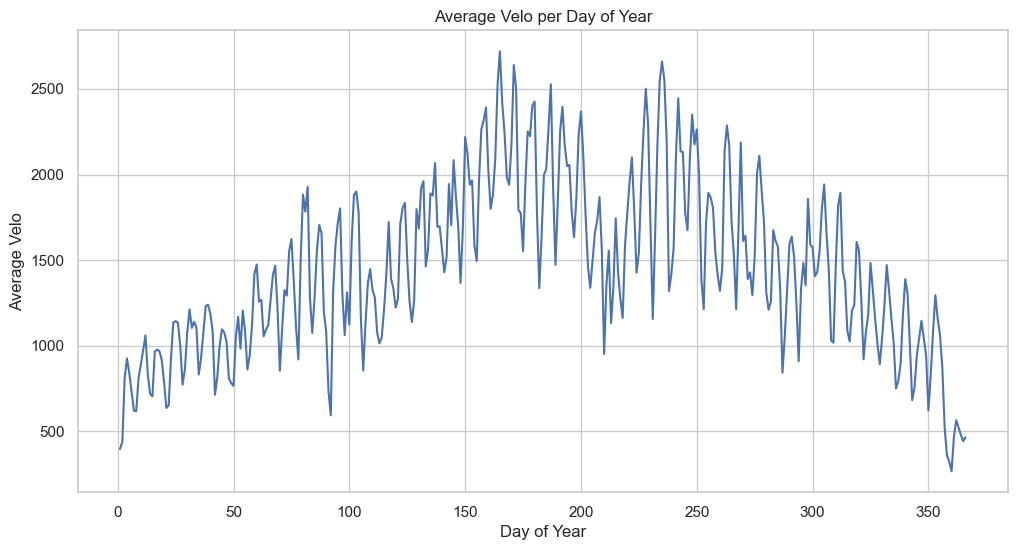

In [13]:
# Average velo per day of year
plt.figure(figsize=(12,6))
df.groupby("day_of_year")["Velo"].mean().plot()
plt.title("Average Velo per Day of Year")
plt.xlabel("Day of Year")
plt.ylabel("Average Velo")
plt.show()


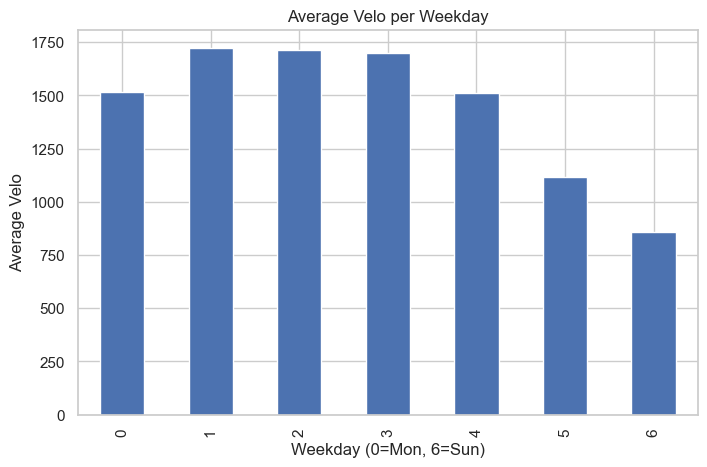

In [14]:
#velo per weekday
plt.figure(figsize=(8,5))
df.groupby("weekday")["Velo"].mean().plot(kind="bar")
plt.title("Average Velo per Weekday")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Average Velo")
plt.show()


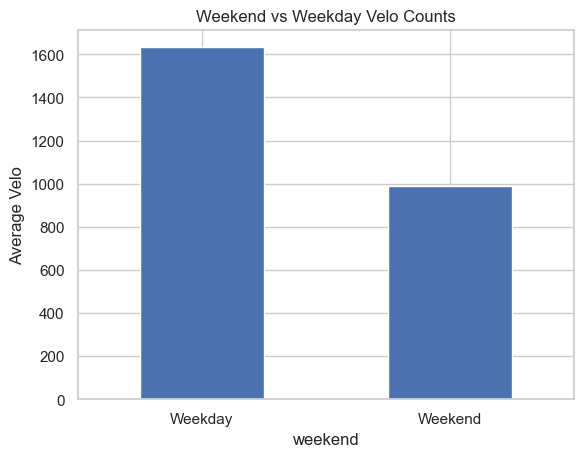

In [15]:
# Weekend vs weekday
df.groupby("weekend")["Velo"].mean().plot(kind="bar")
plt.title("Weekend vs Weekday Velo Counts")
plt.xticks([0,1], ["Weekday","Weekend"], rotation=0)
plt.ylabel("Average Velo")
plt.show()


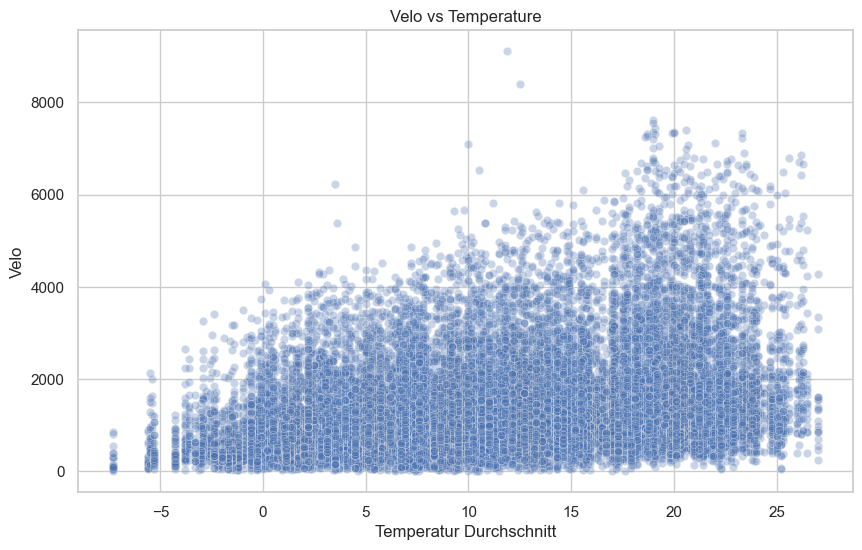

In [ ]:
# Weather Effects, Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Temperatur Durchschnitt", y="Velo", alpha=0.3)
plt.title("Velo vs Temperature")
plt.show()


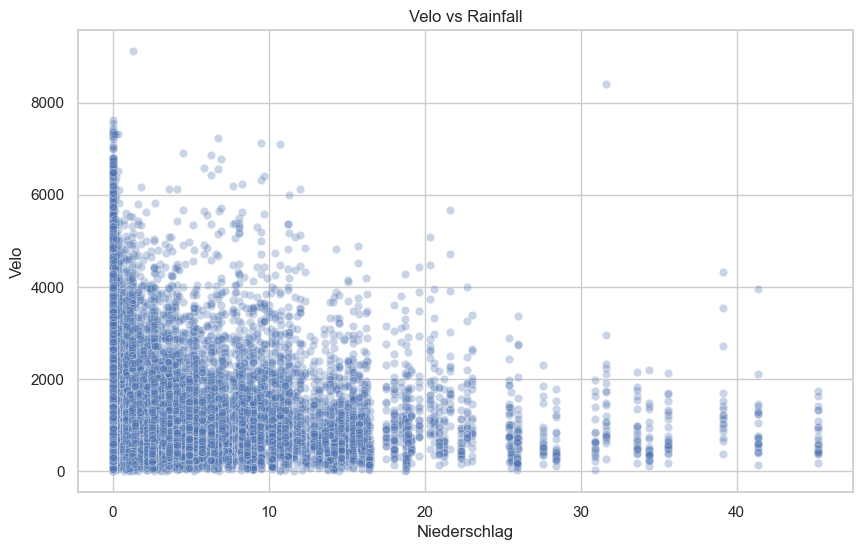

In [17]:
# Weather Effects, Rain
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Niederschlag", y="Velo", alpha=0.3)
plt.title("Velo vs Rainfall")
plt.show()


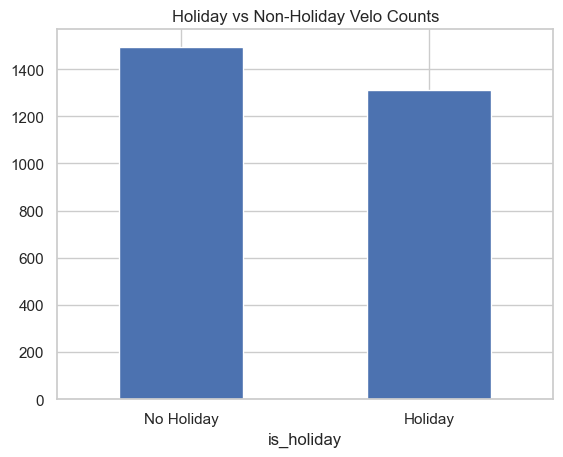

In [18]:
# Holiday Effects, Holidays vs non-holidays
df.groupby("is_holiday")["Velo"].mean().plot(kind="bar")
plt.title("Holiday vs Non-Holiday Velo Counts")
plt.xticks([0,1], ["No Holiday","Holiday"], rotation=0)
plt.show()


In [19]:
top10 = df.groupby("Standort_ID")["Velo"].mean().sort_values(ascending=False).head(10)
top10


Standort_ID
2989    3668.463504
4249    3250.154739
1037    2692.630474
4254    2589.531250
4267    2139.166031
4266    2118.336770
4259    2000.595506
3008    1997.624161
4270    1815.994695
3598    1813.053111
Name: Velo, dtype: float64

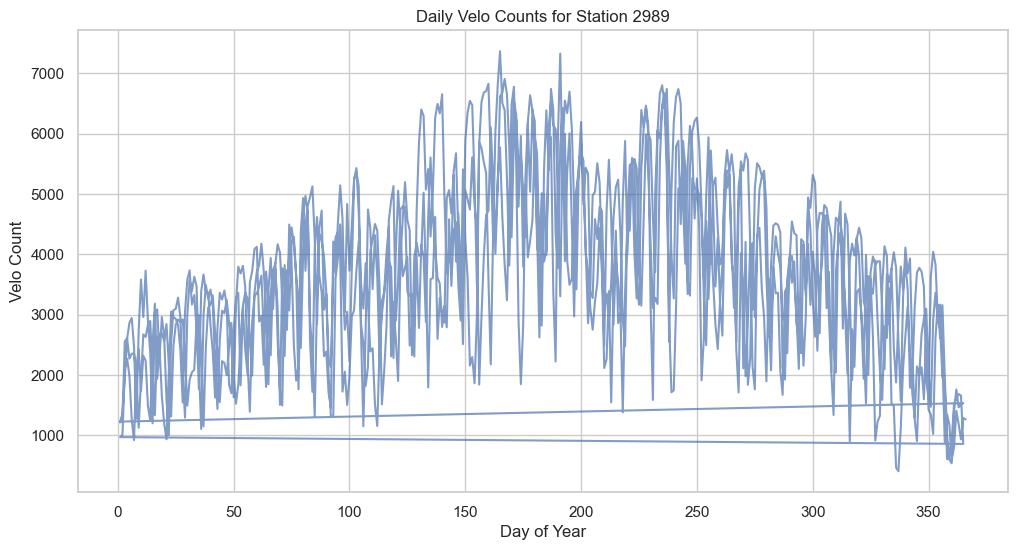

In [20]:
station_id = top10.index[0]  # or pick any station
subset = df[df["Standort_ID"] == station_id]

plt.figure(figsize=(12,6))
plt.plot(subset["day_of_year"], subset["Velo"], alpha=0.7)
plt.title(f"Daily Velo Counts for Station {station_id}")
plt.xlabel("Day of Year")
plt.ylabel("Velo Count")
plt.show()


In [21]:
df.corr(numeric_only=True)["Velo"].sort_values(ascending=False)


Velo                       1.000000
Temperatur Durchschnitt    0.350867
day_of_year                0.052097
year                       0.010528
Standort_ID               -0.068130
is_holiday                -0.069811
Niederschlag              -0.126406
weekday                   -0.215424
weekend                   -0.259215
Name: Velo, dtype: float64

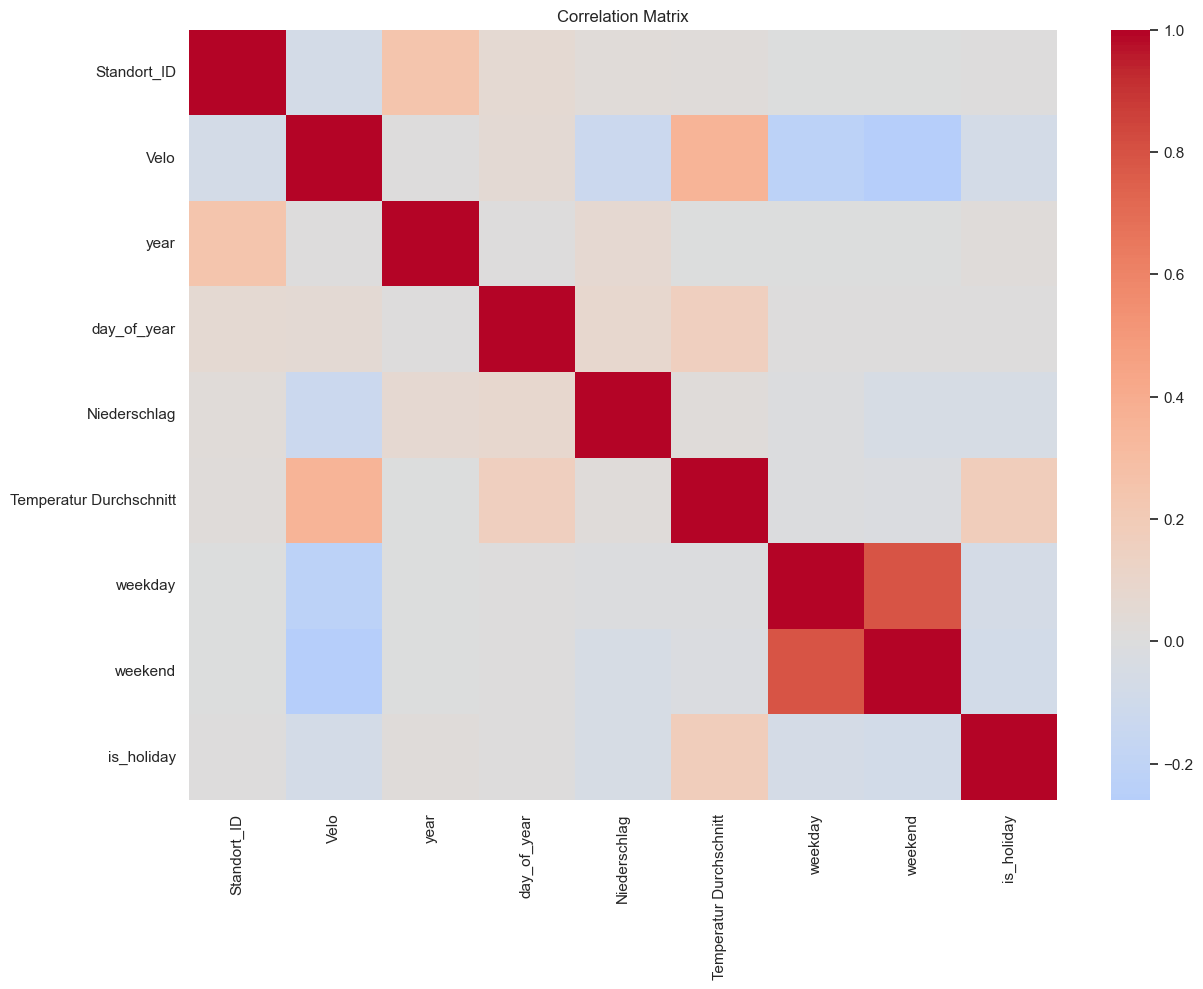

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()
